In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("Lab2.csv")

In [11]:
df

,Hash,Message,Hashes of parents,Is a merge commit?,Filename,Source Code (before),Source Code (current),Diff,LLM Inference
0,d2fdcba29db2a88056cfa87d9abfbdde840bd8c2,fix test name (#22),21b10ffb130aeac3131899e551939338b0dcebef,No,test_openai.py,"""""""Test OpenAI API wrapper.""""""\n\nfrom langcha...","""""""Test OpenAI API wrapper.""""""\n\nfrom langcha...","@@ -3,8 +3,8 @@\n from langchain.llms.openai i...",add missing docstring
1,6a3dca888ba75e219185c54cd0f0ba72d1f90a26,Fix cohere integration (#33)\n\nCurrently the ...,c7f9c62532f8137db2c4ab80335ac1472e79d56a,No,cohere.py,"""""""Wrapper around Cohere APIs.""""""\nimport os\n...","""""""Wrapper around Cohere APIs.""""""\nimport os\n...","@@ -22,7 +22,7 @@ class Cohere(BaseModel, LLM)...",model attribute for gptd-instruct-tft
2,90a6e578bc8d2147f5fcc22d6413686027eca2b5,fix type hint (#34),6a3dca888ba75e219185c54cd0f0ba72d1f90a26,No,cohere.py,"""""""Wrapper around Cohere APIs.""""""\nimport os\n...","""""""Wrapper around Cohere APIs.""""""\nimport os\n...","@@ -22,7 +22,7 @@ class Cohere(BaseModel, LLM)...",model attribute for model_name_to_json
3,eb36317f9ae6054a9bbf62ac7ceb8bae388ee811,Harrison/fix imports (#72)\n\nfix imports and ...,a5b61d59e193c4f9804c9dece7bd1a1c5c1103e0,No,embeddings.ipynb,"{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","@@ -5,11 +5,26 @@\n ""execution_count"": 1,\n...",update error message
4,eb36317f9ae6054a9bbf62ac7ceb8bae388ee811,Harrison/fix imports (#72)\n\nfix imports and ...,a5b61d59e193c4f9804c9dece7bd1a1c5c1103e0,No,mrkl.ipynb,"{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","{\n ""cells"": [\n {\n ""cell_type"": ""markdown...","@@ -1,5 +1,14 @@\n {\n ""cells"": [\n+ {\n+ ...",add a notebook to the default cell_type
...,...,...,...,...,...,...,...,...,...
15651,b42dac5fe6fce40336e327b07415fc781a16dd39,docs: standardize `OllamaLLM` and `BaseOpenAI`...,e0a4af8d8b024895865aba9e02bd9b8791ecc33a,No,llms.py,"""""""Ollama large language models.""""""\n\nfrom __...","""""""Ollama large language models.""""""\n\nfrom __...","@@ -24,15 +24,93 @@ from ._utils import valida...",update ollama lcm example
15652,b42dac5fe6fce40336e327b07415fc781a16dd39,docs: standardize `OllamaLLM` and `BaseOpenAI`...,e0a4af8d8b024895865aba9e02bd9b8791ecc33a,No,base.py,from __future__ import annotations\n\nimport l...,from __future__ import annotations\n\nimport l...,"@@ -49,7 +49,120 @@ def _stream_response_to_ge...",update base_openai.py
15653,6b5fdfb8049addd7d8eef98e835a3204a26f553c,release(text-splitters): 0.3.11 (#32770)\n\nFi...,b42dac5fe6fce40336e327b07415fc781a16dd39,No,pyproject.toml,"[build-system]\nrequires = [""pdm-backend""]\nbu...","[build-system]\nrequires = [""pdm-backend""]\nbu...","@@ -8,10 +8,9 @@ license = { text = ""MIT"" }\n ...",update en-core-web-sm to v0.3.11
15654,6b5fdfb8049addd7d8eef98e835a3204a26f553c,release(text-splitters): 0.3.11 (#32770)\n\nFi...,b42dac5fe6fce40336e327b07415fc781a16dd39,No,test_nlp_text_splitters.py,"""""""Test text splitting functionality using NLT...","""""""Test text splitting functionality using NLT...","@@ -20,7 +20,18 @@ def spacy() -> Any:\n ...",skip test if en_core_web_sm is not installed


In [ ]:
print(f"Total Number of Commits: {df["Hash"].unique().shape[0]}")

In [ ]:
print(f"Total number of Unique files: {df["Filename"].unique().shape[0]}")

In [ ]:
avg = df["Filename"].shape[0] / df["Hash"].unique().shape[0]

In [ ]:
print(f"Average number of files modified per commit: {avg}")

Average number of files modified per commit: 3.914


In [ ]:
!pip install transformers
!pip install sentence-transformers

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.5.23 requires tokenizers<=0.20.3,>=0.13.2, but you have tokenizers 0.21.4 which is incompatible.


In [9]:
def clean_diff(diff):
    """Keep only changed lines, strip +/-, join as one string."""
    if not isinstance(diff, str):
        return ""
    lines = []
    for line in diff.splitlines():
        if line.startswith(('+', '-')) and not line.startswith(('+++', '---')):
            lines.append(line[1:].strip())
    return " ".join(lines)


In [13]:
df["LLM Inference"].astype(str).apply(lambda x: x.split()[0]).value_counts()

LLM Inference
fix                         7157
add                         5569
update                      1078
raise                        272
ignore                       251
                            ... 
message_chunk_to_message       1
Amazon                         1
call                           1
patch                          1
find                           1
Name: count, Length: 357, dtype: int64

In [15]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 16.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.4 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- ------------------------------- 1/5 [fonttools]
   -------- -

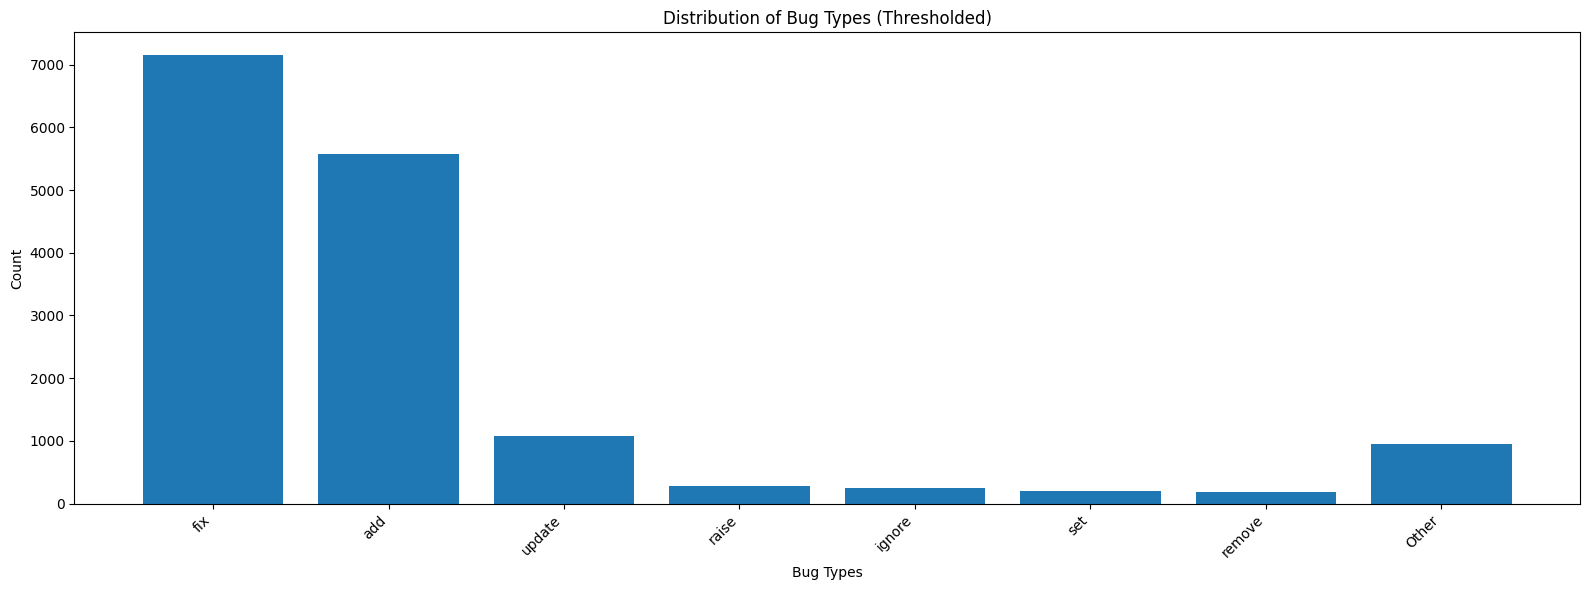

In [23]:
import matplotlib.pyplot as plt

# 1) Extract the first word of each commit message
first_words = df["LLM Inference"].astype(str).apply(lambda x: x.split()[0])

# 2) Count frequencies
counts = first_words.value_counts()

# 3) Thresholding: group rare categories into "Other"
threshold = 50
counts = counts[counts > threshold]  # keep only frequent categories
other_count = first_words.isin(counts.index).sum()
counts["Other"] = len(first_words) - other_count

# 4) Plot
plt.figure(figsize=(16, 6))
plt.bar(counts.index, counts.values)

plt.xlabel("Bug Types")
plt.ylabel("Count")
plt.title("Distribution of Bug Types (Thresholded)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [4]:
df["Filetype"] = df["Filename"].apply(lambda x: x.split(".")[-1])

In [1]:
import pandas as pd
df = pd.read_csv('llm_inference.csv')

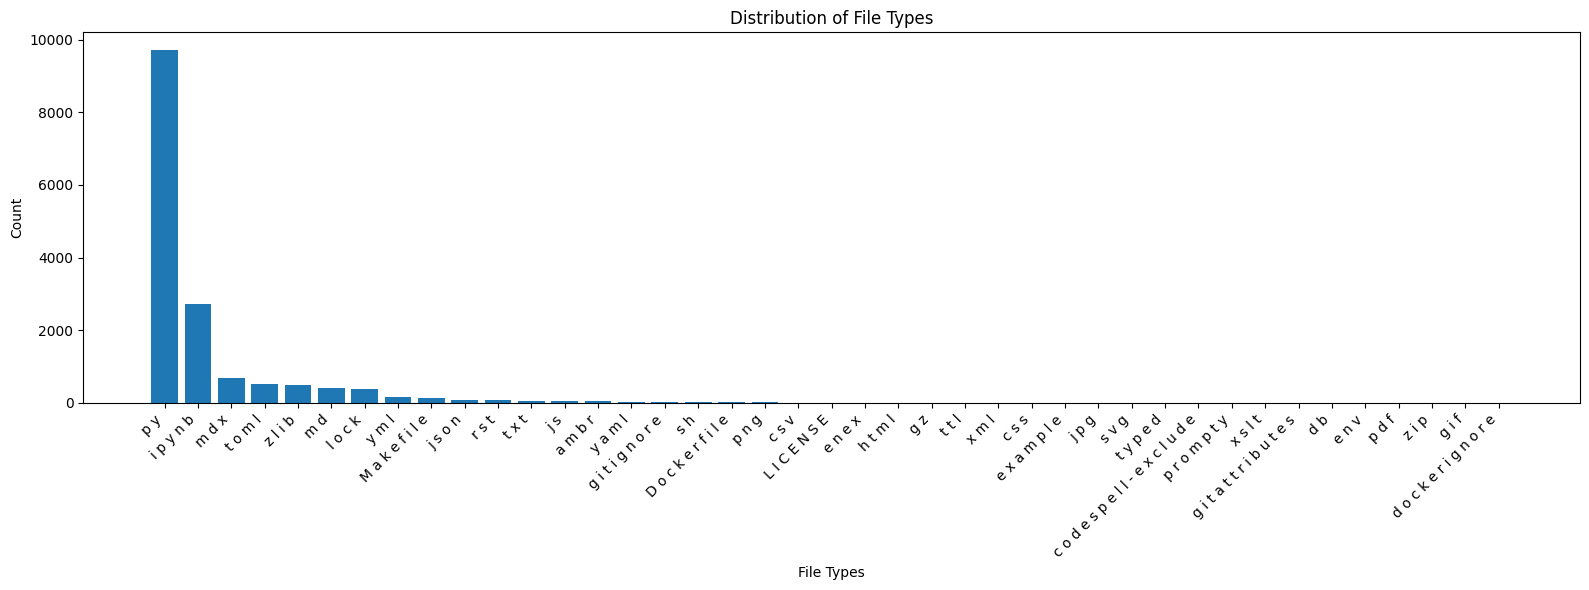

In [5]:
import matplotlib.pyplot as plt

# 1) Create a wider figure first (width x height in inches)
plt.figure(figsize=(16, 6))  # make wider to spread x-axis [3]

# 2) Build data once to avoid recomputing
vc = df["Filetype"].apply(lambda x: " ".join(x)).value_counts()

# 3) Plot
plt.bar(vc.index.values, vc.values)

# 4) Labels/ticks
plt.xlabel("File Types")
plt.ylabel("Count")
plt.title("Distribution of File Types")
plt.xticks(rotation=45, ha='right')  # rotate and right-align to avoid overlap [7]

# 5) Let Matplotlib adjust margins to fit rotated labels
plt.tight_layout()  # or fig.tight_layout() if using OO API [12]

plt.show()


In [6]:
!pip install radon


   -------------------- ------------------- 1/2 [radon]
   ---------------------------------------- 2/2 [radon]



In [3]:
df = df.iloc[:1000]

In [5]:
import pandas as pd
from radon.metrics import mi_visit
from radon.complexity import cc_visit
from radon.raw import analyze
from tqdm import tqdm

# enable tqdm for pandas apply
tqdm.pandas()

def get_metrics(code: str):
    """Extract MI, CC, LOC from code string"""
    try:
        # Maintainability Index
        mi = mi_visit(code, True)

        # Cyclomatic Complexity (sum across functions/classes)
        blocks = cc_visit(code)
        cc = sum(b.complexity for b in blocks) if blocks else 0

        # Raw metrics (loc, lloc, comments, etc.)
        raw = analyze(code)
        loc = raw.loc

        return mi, cc, loc
    except Exception:
        return None, None, None

# Extract metrics for before and after with progress bar
df[["MI_Before", "CC_Before", "LOC_Before"]] = (
    df["Source Code (before)"]
    .progress_apply(get_metrics)
    .apply(pd.Series)
)

df[["MI_After", "CC_After", "LOC_After"]] = (
    df["Source Code (current)"]
    .progress_apply(get_metrics)
    .apply(pd.Series)
)

# Compute change columns
df["MI_Change"]  = df["MI_After"] - df["MI_Before"]
df["CC_Change"]  = df["CC_After"] - df["CC_Before"]
df["LOC_Change"] = df["LOC_After"] - df["LOC_Before"]

# Save
df.to_csv("radon_metrics.csv", index=False)
print("✅ Metrics + change columns added.")


100%|██████████| 1000/1000 [05:33<00:00,  3.00it/s]


✅ Metrics + change columns added.


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
import numpy as np

# Load CodeBERT
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")

def embed_code(code: str):
    """Get embedding vector for a piece of code using CodeBERT."""
    inputs = tokenizer(code, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        # Use [CLS] token embedding as sentence embedding
        embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

def normalize(vectors):
    return vectors / np.linalg.norm(vectors, axis=1, keepdims=True)

def compute_similarity(code1: str, code2: str):
    """Compute cosine similarity between two code snippets."""
    emb1 = embed_code(code1)
    emb2 = embed_code(code2)
    emb1_norm = normalize(emb1)
    emb2_norm = normalize(emb2)
    similarity = F.cosine_similarity(emb1, emb2).item()
    return similarity

In [ ]:
df["Source Code (before)"] = df["Source Code (before)"].fillna("").astype(str)
df["Source Code (current)"] = df["Source Code (current)"].fillna("").astype(str)

In [ ]:
from tqdm import tqdm

# Add progress bar
df["Semantic Similarity"] = [
    compute_similarity(msg, diff)
    for msg, diff in tqdm(
        zip(df['Source Code (before)'], df["Source Code (current)"]),
        total=len(df),
        desc="Computing semantic similarity"
    )
]


Computing semantic similarity: 100%|██████████| 1000/1000 [16:22<00:00,  1.02it/s]
C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\1473881828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_final_lab_3["Semantic Similarity"] = [


C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\46084469.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Semantic Similarity"].clip(0,1), shade=True, label="CodeBERT Similarity")


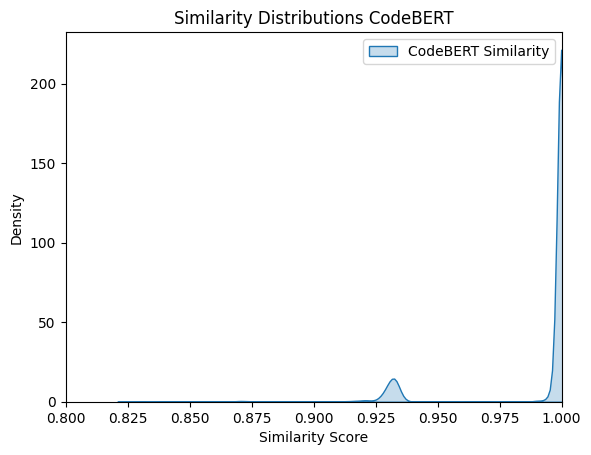

In [ ]:

sns.kdeplot(df["Semantic Similarity"].clip(0,1), shade=True, label="CodeBERT Similarity")
# sns.kdeplot(df["Token Similarity"].clip(0,1), shade=True, label="BLEU Similarity")
plt.xlim(0.8,1)
plt.xlabel("Similarity Score")
plt.ylabel("Density")
plt.title("Similarity Distributions CodeBERT")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Simple whitespace tokenizer (you can replace with a code parser if needed)
def tokenize_code(code: str):
    return code.strip().split()

def compute_bleu(reference: str, hypothesis: str):
    ref_tokens = [tokenize_code(reference)]
    hyp_tokens = tokenize_code(hypothesis)
    # Add smoothing to avoid 0 scores on short snippets
    smoothie = SmoothingFunction().method4
    return sentence_bleu(ref_tokens, hyp_tokens, smoothing_function=smoothie)

In [ ]:
df["Token Similarity"] = [compute_bleu(msg, diff) for msg, diff in zip(df['Source Code (before)'].astype(str), df["Source Code (current)"].astype(str))]

C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_16404\3473066472.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Token Similarity"].clip(0,1), shade=True, label="BLEU Similarity")


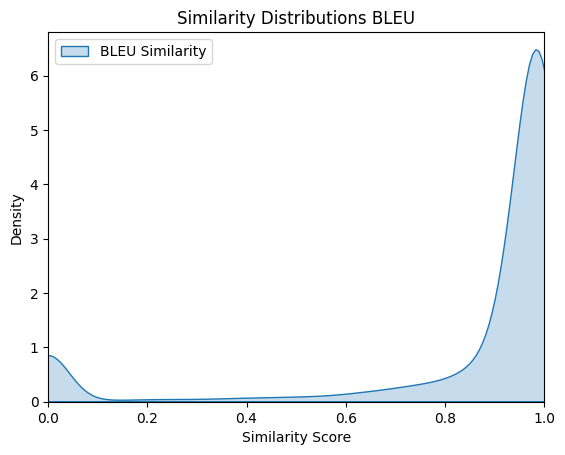

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.kdeplot(df["Semantic Similarity"].clip(0,1), shade=True, label="CodeBERT Similarity")
sns.kdeplot(df["Token Similarity"].clip(0,1), shade=True, label="BLEU Similarity")
plt.xlim(0,1)
plt.xlabel("Similarity Score")
plt.ylabel("Density")
plt.title("Similarity Distributions BLEU")
plt.legend()
plt.show()


In [ ]:
df["Semantic Similarity"].median()

0.9999099969863892

In [ ]:
median_val = df_token["Token Similarity"].median()
df_token["Token Class"] = df_token["Token Similarity"].gt(median_val).map({True: "Minor", False: "Major"})

C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\4078172352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_token["Token Class"] = df_token["Token Similarity"].gt(median_val).map({True: "Minor", False: "Major"})


In [ ]:
median_val = df_token["Semantic Similarity"].median()
df_token["Semantic Class"] = df_token["Semantic Similarity"].gt(median_val).map({True: "Minor", False: "Major"})

C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\2679502972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_token["Semantic Class"] = df_token["Semantic Similarity"].gt(median_val).map({True: "Minor", False: "Major"})


In [ ]:
df_token["Classes Agree"] = df_token["Token Class"] == df_token["Semantic Class"]

C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\84061174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_token["Classes Agree"] = df_token["Token Class"] == df_token["Semantic Class"]


In [ ]:
df_token["Classes Agree"] = df_token["Classes Agree"].apply(lambda x: "Yes" if x else "No")

C:\Users\Surrya Gokul\AppData\Local\Temp\ipykernel_23560\2553942184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_token["Classes Agree"] = df_token["Classes Agree"].apply(lambda x: "Yes" if x else "No")


In [ ]:
df

,Hash,Message,Hashes of parents,Is a merge commit?,Filename,Source Code (before),Source Code (current),Diff,LLM Inference,Semantic Similarity,Token Similarity,Token Class,Semantic Class,Classes Agree
0,d2fdcba29db2a88056cfa87d9abfbdde840bd8c2,fix test name (#22),21b10ffb130aeac3131899e551939338b0dcebef,No,test_openai.py,"""""""Test OpenAI API wrapper.""""""\n\nfrom langcha...","""""""Test OpenAI API wrapper.""""""\n\nfrom langcha...","@@ -3,8 +3,8 @@\n from langchain.llms.openai i...",add missing docstring,0.999942,0.793756,Major,Minor,No
1,6a3dca888ba75e219185c54cd0f0ba72d1f90a26,Fix cohere integration (#33)\n\nCurrently the ...,c7f9c62532f8137db2c4ab80335ac1472e79d56a,No,cohere.py,"""""""Wrapper around Cohere APIs.""""""\nimport os\n...","""""""Wrapper around Cohere APIs.""""""\nimport os\n...","@@ -22,7 +22,7 @@ class Cohere(BaseModel, LLM)...",model attribute for gptd-instruct-tft,0.999883,0.992509,Major,Major,Yes
2,90a6e578bc8d2147f5fcc22d6413686027eca2b5,fix type hint (#34),6a3dca888ba75e219185c54cd0f0ba72d1f90a26,No,cohere.py,"""""""Wrapper around Cohere APIs.""""""\nimport os\n...","""""""Wrapper around Cohere APIs.""""""\nimport os\n...","@@ -22,7 +22,7 @@ class Cohere(BaseModel, LLM)...",model attribute for model_name_to_json,0.999933,0.992509,Major,Minor,No
3,eb36317f9ae6054a9bbf62ac7ceb8bae388ee811,Harrison/fix imports (#72)\n\nfix imports and ...,a5b61d59e193c4f9804c9dece7bd1a1c5c1103e0,No,embeddings.ipynb,"{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","@@ -5,11 +5,26 @@\n ""execution_count"": 1,\n...",update error message,0.980119,0.731597,Major,Major,Yes
4,eb36317f9ae6054a9bbf62ac7ceb8bae388ee811,Harrison/fix imports (#72)\n\nfix imports and ...,a5b61d59e193c4f9804c9dece7bd1a1c5c1103e0,No,embeddings.ipynb,"{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","{\n ""cells"": [\n {\n ""cell_type"": ""code"",\n...","@@ -5,11 +5,26 @@\n ""execution_count"": 1,\n...",update error message,0.980119,0.949274,Major,Major,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484230,21bfc95e14fd42c4a009b79dfb23bac6c8ab5c34,docs: Correct grammatical typos in various doc...,1158d3134d1b53365d0955ec56f03f34c676fd20,No,prompts.py,# flake8: noqa\nfrom langchain_core.prompts.pr...,# flake8: noqa\nfrom langchain_core.prompts.pr...,"@@ -9,7 +9,7 @@ ESQuery:""""""\n \n DEFAULT_DSL_T...",add missing space in the word,0.999991,0.999576,Minor,Minor,Yes
1484231,21bfc95e14fd42c4a009b79dfb23bac6c8ab5c34,docs: Correct grammatical typos in various doc...,1158d3134d1b53365d0955ec56f03f34c676fd20,No,prompts.py,# flake8: noqa\nfrom langchain_core.prompts.pr...,# flake8: noqa\nfrom langchain_core.prompts.pr...,"@@ -9,7 +9,7 @@ ESQuery:""""""\n \n DEFAULT_DSL_T...",add missing space in the word,0.999991,0.999021,Minor,Minor,Yes
1484232,21bfc95e14fd42c4a009b79dfb23bac6c8ab5c34,docs: Correct grammatical typos in various doc...,1158d3134d1b53365d0955ec56f03f34c676fd20,No,prompt.py,# flake8: noqa\nfrom langchain_core.output_par...,# flake8: noqa\nfrom langchain_core.output_par...,"@@ -10,7 +10,7 @@ Question: {input}""""""\n \n _D...",fix typo in question,0.999976,0.995001,Minor,Minor,Yes
1484233,21bfc95e14fd42c4a009b79dfb23bac6c8ab5c34,docs: Correct grammatical typos in various doc...,1158d3134d1b53365d0955ec56f03f34c676fd20,No,prompt.py,# flake8: noqa\nfrom langchain_core.output_par...,# flake8: noqa\nfrom langchain_core.output_par...,"@@ -10,7 +10,7 @@ Question: {input}""""""\n \n _D...",fix typo in question,0.999976,0.999576,Minor,Minor,Yes


In [ ]:
df["Classes Agree"].value_counts(normalize=True)*100

Classes Agree
Yes    77.4
No     22.6
Name: proportion, dtype: float64

In [ ]:
df.to_csv("Lab3.csv", index=False)